In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [2]:
# load genotype PC loadings
ukb_pc=pd.read_table('ukb_pca_var_loadings.tsv')
print(ukb_pc.shape)
display(ukb_pc.iloc[:,:9].tail())

(147604, 48)


,#CHROM,POS,ID,REF,ALT,affymetrix_snp_id,affymetrix_probeset_id,strand,PC1_loading
147599,22,51173542,rs4824147,T,C,Affx-19824865,AX-40952541,+,0.001486
147600,22,51174939,rs73174435,C,T,Affx-19824883,AX-33748923,+,-0.001451
147601,22,51175626,rs3810648,A,G,Affx-19824886,AX-11482459,+,0.003611
147602,22,51177257,rs73174437,C,T,Affx-19824901,AX-33748933,+,-0.001203
147603,22,51185848,rs3865764,G,A,Affx-19825047,AX-33748977,+,0.001054


In [3]:
# load DeGAs PC loadings
proj_dir=''
z=np.load(proj_dir+'datasets/train/v2/tsvd/all_beta_center_p1e-06_20200506_500PCs.npz',
          allow_pickle=True)
dgs_pc=z['U']
dgs_vs=z['label_var']
print(z['U'].shape)
print(z['label_var'].shape)

(186377, 500)
(186377,)


In [4]:
# check intersect size, and that it isn't just matching rsids
shared_vars=list(set(z['label_var']) & set(ukb_pc['ID']))
print(len(shared_vars))
print(any(['Affx' in i for i in shared_vars]))

45126
True


In [5]:
# make joined dataFrame
ukb_pc.index=ukb_pc.ID
ukb_pc_small=ukb_pc.loc[shared_vars,['PC{}_loading'.format(i+1) for i in range(40)]]
dgs_pc_small=pd.DataFrame(dgs_pc, index=dgs_vs, 
                          columns=['PC{}_degas'.format(i+1) for i in range(500)]).loc[shared_vars,:]

In [6]:
# compute correlations
correlations=pd.concat((ukb_pc_small.T, dgs_pc_small.T)).T.corr()

In [7]:
# max. correlation by genetic PC
(correlations**2).iloc[:40,-500:].max(axis=1)

PC1_loading     0.001172
PC2_loading     0.000806
PC3_loading     0.000874
PC4_loading     0.003757
PC5_loading     0.000727
PC6_loading     0.000355
PC7_loading     0.000671
PC8_loading     0.000487
PC9_loading     0.000713
PC10_loading    0.000635
PC11_loading    0.000430
PC12_loading    0.000394
PC13_loading    0.000700
PC14_loading    0.000433
PC15_loading    0.000739
PC16_loading    0.000224
PC17_loading    0.000249
PC18_loading    0.000295
PC19_loading    0.000658
PC20_loading    0.002703
PC21_loading    0.001286
PC22_loading    0.002882
PC23_loading    0.001578
PC24_loading    0.000898
PC25_loading    0.000522
PC26_loading    0.000728
PC27_loading    0.001144
PC28_loading    0.000276
PC29_loading    0.001477
PC30_loading    0.000662
PC31_loading    0.000442
PC32_loading    0.000561
PC33_loading    0.000993
PC34_loading    0.000633
PC35_loading    0.000763
PC36_loading    0.001091
PC37_loading    0.002410
PC38_loading    0.002814
PC39_loading    0.000450
PC40_loading    0.002593


In [8]:
# maximal correlation
(correlations**2).iloc[:40,-500:].max().max()

0.0037573854326884734

In [9]:
# check PC index
print(np.where((correlations**2)==0.0037573854326883346))
correlations.iloc[2:5,45:48]

(array([], dtype=int64), array([], dtype=int64))


,PC6_degas,PC7_degas,PC8_degas
PC3_loading,-0.004461,0.029567,0.011555
PC4_loading,-0.022346,0.061298,0.020608
PC5_loading,-0.011007,-0.004872,0.004905


In [10]:
ss.pearsonr(ukb_pc_small['PC4_loading'], dgs_pc_small['PC7_degas'])

(0.06129751571388698, 7.915845262756423e-39)

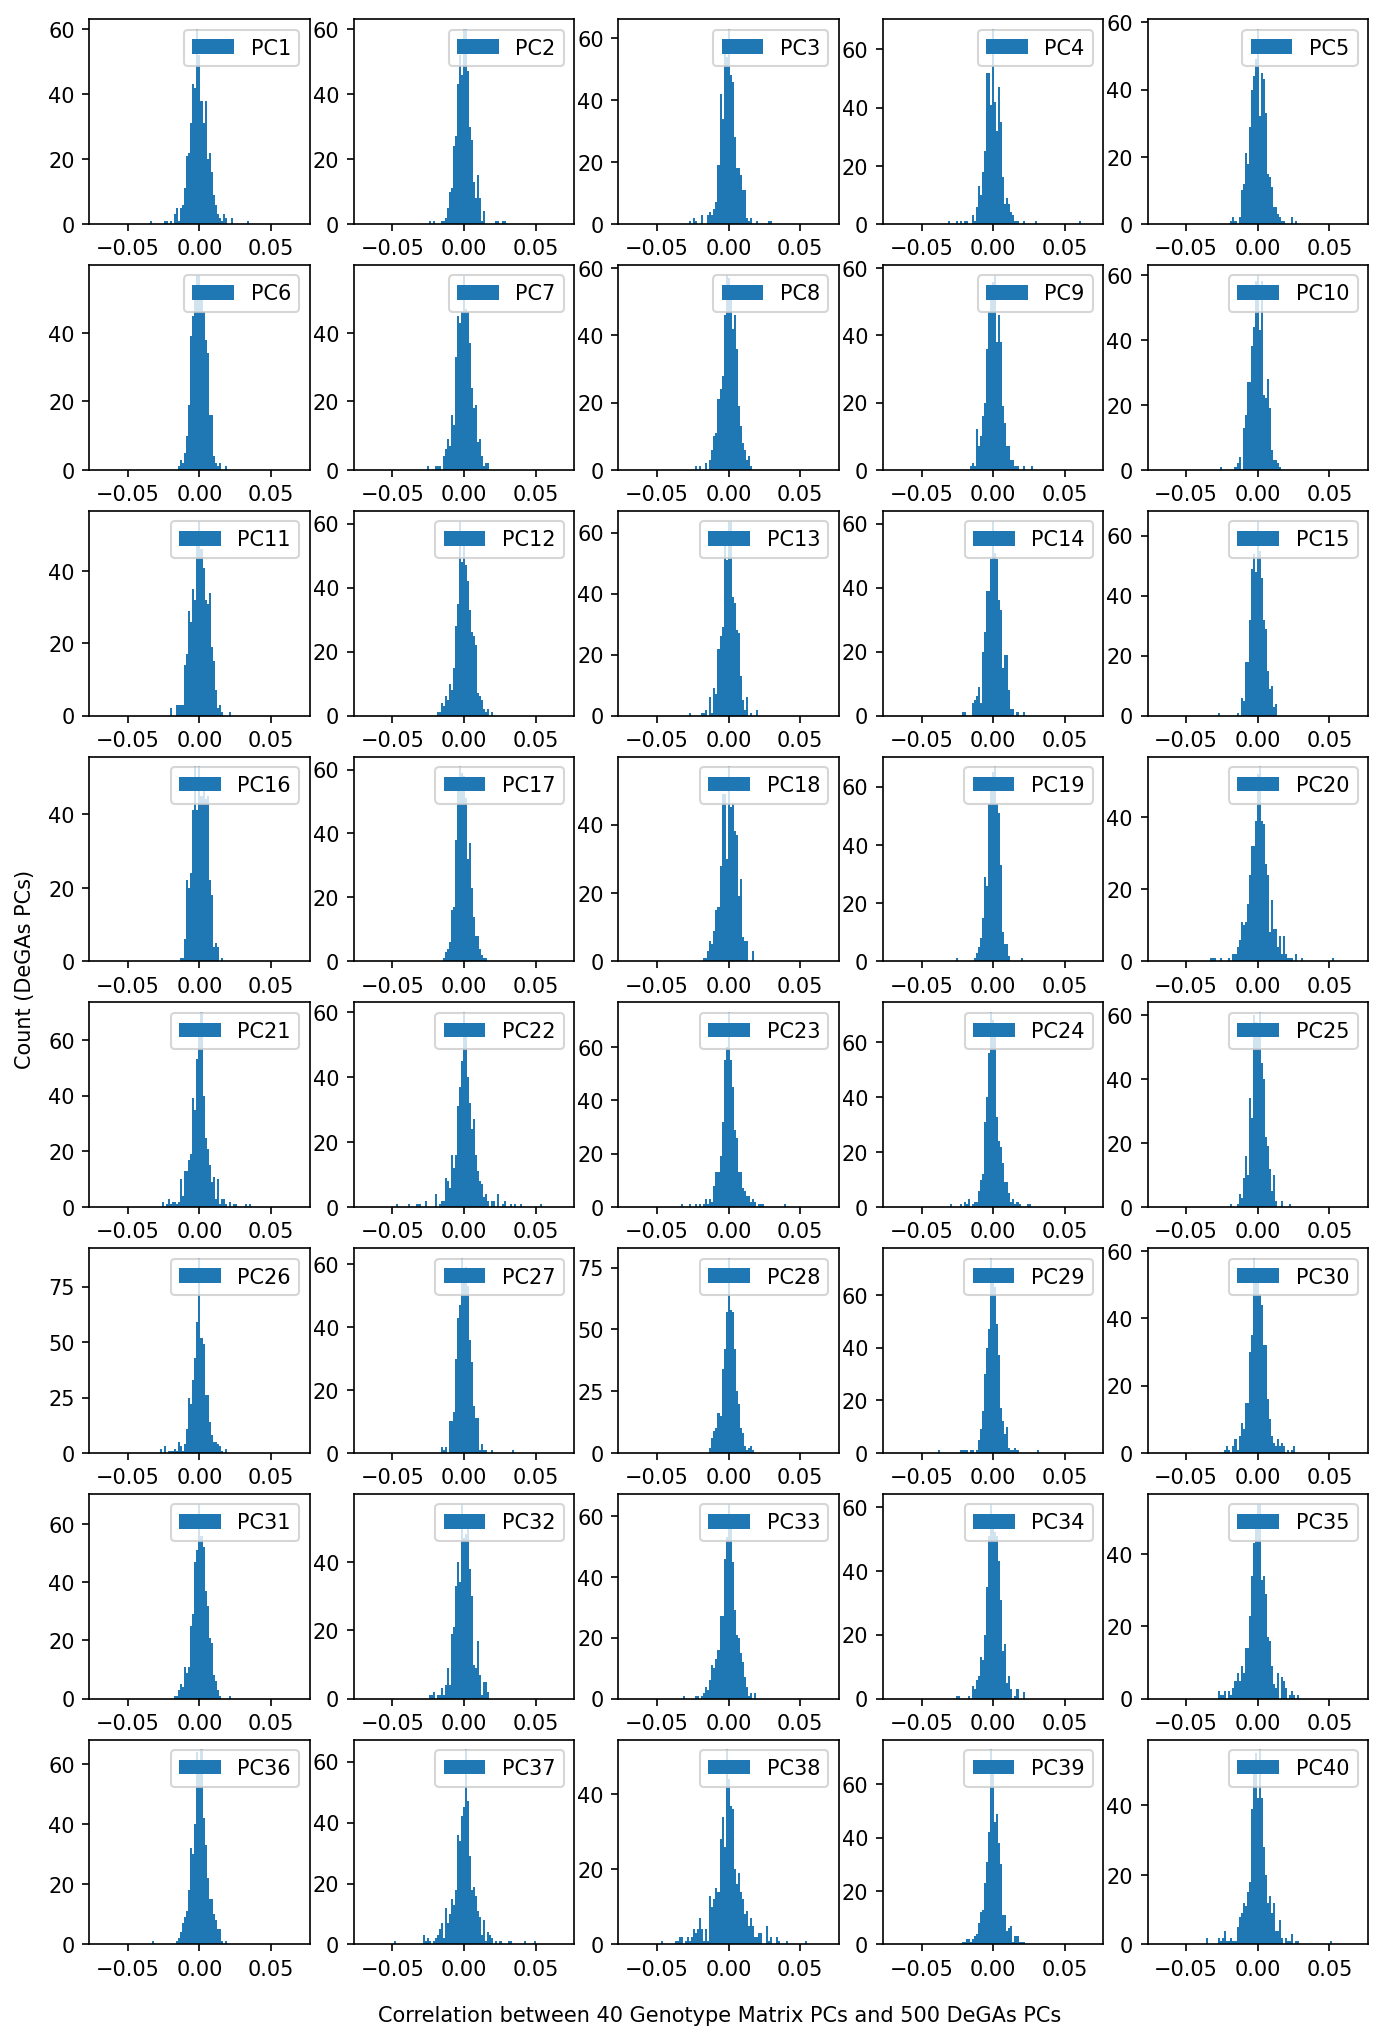

In [11]:
# display distribution of correlation coefficients (expect tightly centered about zero)
fig=plt.figure(figsize=(11,17), dpi=150)
for pc in range(40):
    plt.subplot(8,5,pc+1)
    plt.hist(correlations.iloc[pc,40:], bins=np.linspace(-0.07, 0.07, 100))
    plt.legend(['PC'+str(pc+1)])
fig.text(x=0.3, y=0.095, s='Correlation between 40 Genotype Matrix PCs and 500 DeGAs PCs')
fig.text(x=0.08, y=0.47, s='Count (DeGAs PCs)', rotation=90)
plt.show()